### IMPORTING LIBRARIES

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_absolute_error, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the CSV File
pp_data = pd.read_csv('preprocessed_dataset/preprocessed_adult_data.csv')
pp_data

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,income
0,-1.739973,-0.548210,-0.305605,-1.211814,-0.478762,1.519724,0.909716,0.104302,0.064780,-0.774960,-0.483548,1.0
1,1.208603,0.875581,2.772370,-1.828170,-0.519571,0.026242,0.439920,-0.308582,-1.103199,1.104341,-2.399764,-1.0
2,-0.767958,-1.707485,-0.628163,0.326755,0.177311,1.642839,1.813591,1.341614,1.088424,-0.029719,-0.449990,1.0
3,-1.419300,-0.082746,-0.729825,0.734258,0.504447,-0.931894,0.642353,-0.499929,-0.280621,1.011346,0.878901,1.0
4,-1.752141,-1.576331,0.553171,-0.343186,-2.478467,1.910010,0.361908,0.585583,1.696244,0.387817,-0.115954,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22399,-1.429314,0.172672,0.235573,-1.032210,-0.564334,0.312588,-0.729262,0.131094,-0.636445,-0.520550,-0.234062,1.0
22400,-0.059540,-2.559138,-0.386663,0.865967,0.721946,0.296701,-0.889219,0.652744,-1.570875,-0.793583,0.091083,1.0
22401,-0.050174,0.943519,-0.733316,-0.431849,-0.322066,1.209279,-0.678588,-1.196035,-1.142357,0.136058,0.437149,-1.0
22402,-0.055907,0.643519,-0.907796,0.242568,0.114753,1.052430,-0.862605,-0.897471,-1.933488,-0.058236,0.419663,-1.0


#### NORMALIZATION (Scaling of values - StandardScalar)

In [3]:
X = pp_data[['PCA1','PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11']]
y = pp_data['income']

### TRAIN/TEST SPLIT

In [4]:
# Splitting train, test variables, where test is 20% of the dataframe.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
X_train.shape, X_test.shape

((17923, 11), (4481, 11))

In [6]:
X_train.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
4739,0.145863,-3.625379,-0.135548,2.300550,-0.716485,-0.648424,-0.328024,0.501185,1.572302,-0.321623,0.112465
5163,-0.444785,0.580800,-0.534680,0.063794,-0.062061,-1.479839,-0.306634,-1.098655,0.292188,-0.113374,0.416123
21981,-2.536373,0.431611,0.664762,-0.829448,-0.423970,0.327905,0.116009,1.734840,-1.101632,-0.888357,-1.113648
3965,-1.795064,0.235414,0.012138,-2.073557,2.381356,0.942353,-0.383416,2.849261,1.126902,0.809140,-0.513704
12465,-1.265075,0.404868,-0.600028,0.978415,0.491080,1.256165,0.647931,1.681935,-1.814173,0.703592,-0.132094


### MODEL TRAINING & MODEL PERFORMANCE METRICS

### NAÏVE BAYES

In [7]:
# Creating a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
gnb = model.fit(X_train,y_train)

# Predictions on the test set
gnb_predictions = gnb.predict(X_test)

# Evaluate Naïve Bayes Classifier
print("Naïve Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, gnb_predictions))
print("Classification Report:")
print(classification_report(y_test, gnb_predictions))

Naïve Bayes Classifier:
Accuracy: 0.904485605891542
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.89      0.93      0.91      2276
         1.0       0.92      0.88      0.90      2205

    accuracy                           0.90      4481
   macro avg       0.91      0.90      0.90      4481
weighted avg       0.91      0.90      0.90      4481



In [8]:
model.score(X_train, y_train)

0.8956089940300173

In [9]:
model.score(X_test, y_test)

0.904485605891542

Random Prediction: ROC AUC=0.500
Naïve Bayes: ROC AUC=0.953


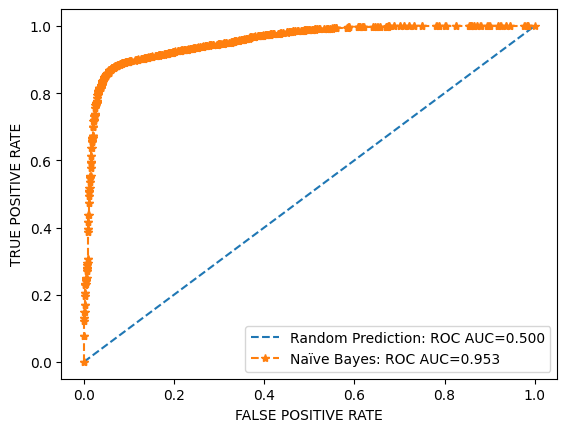

In [10]:
# Predict probabilities
nb_probs = model.predict_proba(X_test)

# Keep probabilities for the positive outcome only
nb_probs1 = nb_probs[:, 1]

ns_probs = [0 for _ in range(len(y_test))]

# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs1)

# Summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Naïve Bayes: ROC AUC=%.3f' % (nb_auc))

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs1)

# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naïve Bayes: ROC AUC=%.3f' % (nb_auc))
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.show()


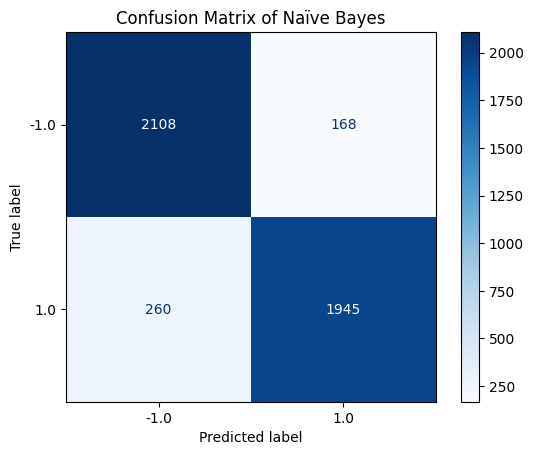

In [11]:
# Display the confusion matrix
cm = confusion_matrix(y_test, gnb_predictions, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Naïve Bayes")
plt.show()

### RANDOM FOREST

In [16]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [80, 90],
    'max_depth': [None, 8, 10], 
    'min_samples_split': [11, 12],
    'min_samples_leaf': [9, 10] 
}

# Initialize the classifier
random= RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator to make predictions
y_pred = grid_search.best_estimator_.predict(X_test)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 11, 'n_estimators': 90}
Best Score: 0.9572057810717665


In [17]:
# Evaluate Naïve Bayes Classifier
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classifier:
Accuracy: 0.9593840660566838
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.97      0.96      2276
         1.0       0.96      0.95      0.96      2205

    accuracy                           0.96      4481
   macro avg       0.96      0.96      0.96      4481
weighted avg       0.96      0.96      0.96      4481



In [18]:
grid_search.score(X_train, y_train)

0.9729397980248842

In [19]:
grid_search.score(X_test, y_test)

0.9593840660566838

Random Prediction: ROC AUC=0.500
Random Forest: ROC AUC=0.994


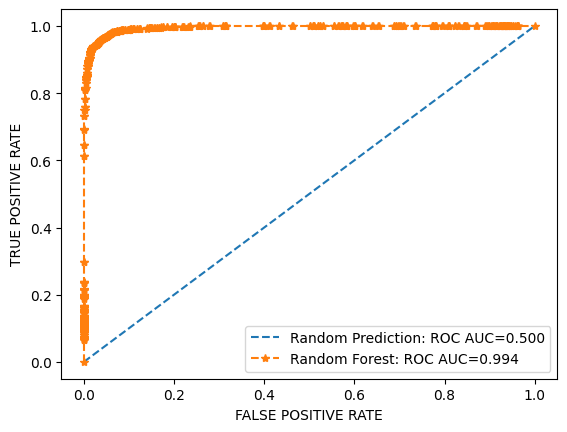

In [20]:
# Predict probabilities
rf_probs = grid_search.predict_proba(X_test)
# Keep probabilities for the positive outcome only
rf_probs1 = rf_probs[:, 1]

ns_probs = [0 for _ in range(len(y_test))]

# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs1)

# Summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs1)

# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.show()

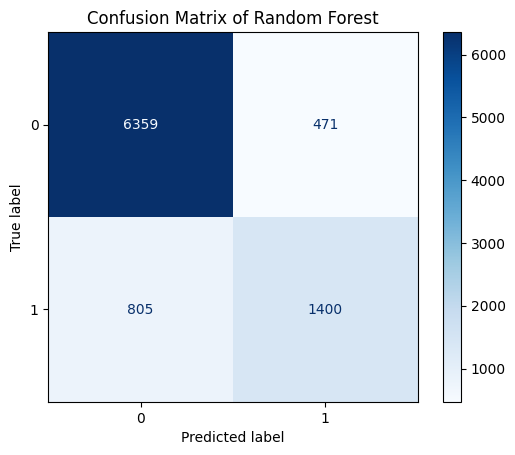

In [23]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Random Forest")
plt.show()

### COMPARING THE TWO MODELS

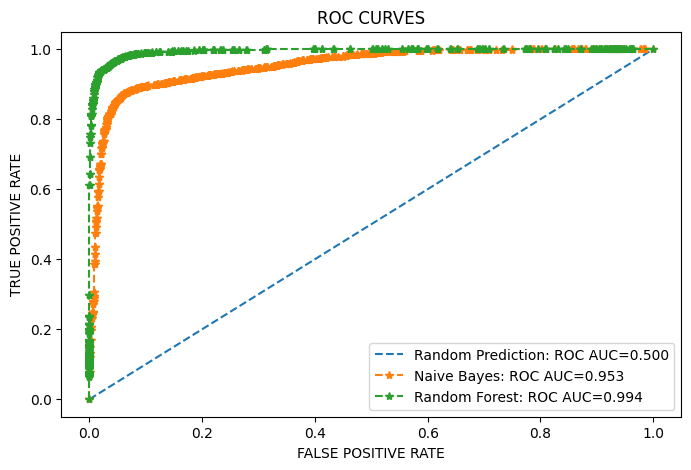

In [21]:
plt.figure(figsize=(8,5))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naive Bayes: ROC AUC=%.3f' % (nb_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))

plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC CURVES')
plt.legend()
plt.show()

In [22]:
random_forest_accuracy = grid_search.score(X_test, y_test)
naïve_bayes_accuracy = model.score(X_test, y_test)

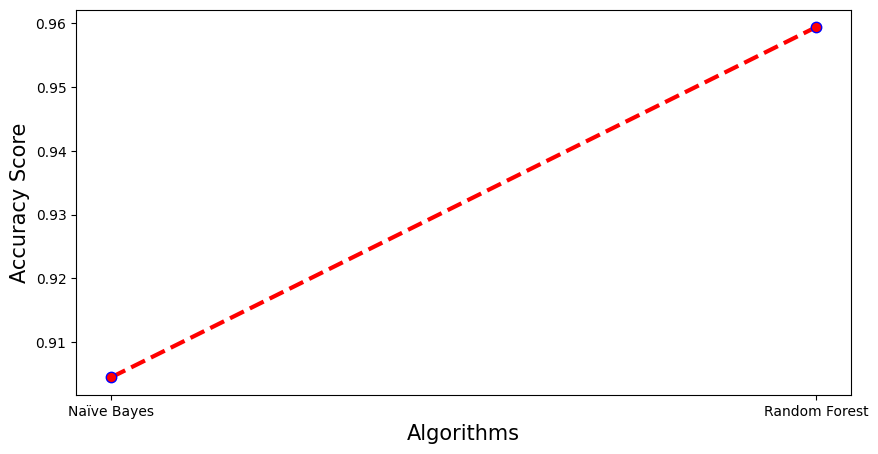

In [23]:
# Comparing Different algorithm models with their respective accuracy.
x=['Naïve Bayes','Random Forest']
y=[naïve_bayes_accuracy, random_forest_accuracy]

plt.figure(1,figsize=(10,5))

plt.plot(x,y,label='line width is 5x',linewidth=3,linestyle="--",color="red",marker='.',markersize=15,markeredgecolor="blue")
plt.xlabel("Algorithms",fontsize=15)
plt.ylabel("Accuracy Score",fontsize=15)

plt.show() 